# Bangalore house price prediction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("bangalore.csv")
print(df.info())
print(df.describe())
df.head(7)
#75% and max value has large diffrence(in bath and price)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB
None
               bath       balcony         price
count  13247.000000  12711.000000  13320.000000
mean       2.692610      1.584376    112.565627
std        1.341458      0.817263    148.971674
min        1.000000      0.000000      8.000000
25%        2.000000      1.000000     50.000000
50%        2.000000      2.000000     72.000000
75%        3.000000     

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
5,Super built-up Area,Ready To Move,Whitefield,2 BHK,DuenaTa,1170,2.0,1.0,38.00
6,Super built-up Area,18-May,Old Airport Road,4 BHK,Jaades,2732,4.0,NaN,204.00


<AxesSubplot:>

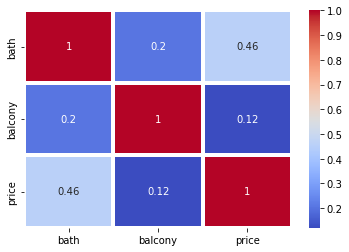

In [3]:
# correlation heatmap
sns.heatmap(df[["bath", "balcony", "price"]].corr(),cmap="coolwarm", annot=True,linewidth=4)
 # correlation of bath is greater than a balcony with price

# Data preprocessing

## Data cleaning

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64
area_type        0.000000
availability     0.000000
location         0.007508
size             0.120120
society         41.306306
total_sqft       0.000000
bath             0.548048
balcony          4.572072
price            0.000000
dtype: float64
After filling balcony feature: 
 area_type        0
availability     0
location         1
size            16
total_sqft       0
bath            73
balcony          0
price            0
dtype: int64
(13246, 8)
After droping remaining NaN rows: 
 area_type       0
availability    0
location        0
size            0
total_sqft      0
bath            0
balcony         0
price           0
dtype: int64


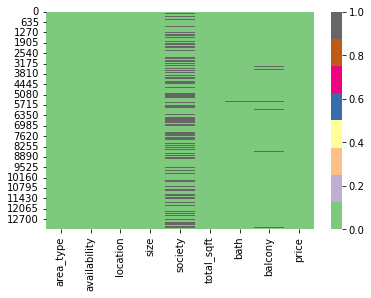

In [4]:
print(df.isnull().sum())
print(df.isnull().mean()*100) 
sns.heatmap(df.isnull(),cmap="Accent")
#society has 41.3% missing value (need to drop)
df2 = df.drop('society', axis='columns')
# fill mean value in balcony feature because it contain 4.5% missing value
df2['balcony'] = df2['balcony'].fillna(df2['balcony'].mean())
print("After filling balcony feature:","\n",df2.isnull().sum())
# drop na value rows from dataframe because there is very less % value missing
df3 = df2.dropna()
print(df3.shape)
print("After droping remaining NaN rows:","\n",df3.isnull().sum()) 

## Feature engineering

In [5]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

#working on total_sqft
print("values count in total_sqft feature:","\n",df2['total_sqft'].value_counts())
# here we observe that 'total_sqft' contain string value in diff format(float,int,range value,in different units) 
# convert int fost,range values to float values and different unit values to NaN values(less percentage)
total_sqft_int = []
for str_val in df3['total_sqft']:
  try:
    total_sqft_int.append(float(str_val))
  except:
    try:
      temp = []
      temp = str_val.split('-')
      total_sqft_int.append((float(temp[0])+float(temp[-1]))/2)
    except:
      total_sqft_int.append(np.nan)

df4 = df3.reset_index(drop=True)
df5 = df4.join(pd.DataFrame({'total_sqft_int':total_sqft_int}))
print("df5 null values count:","\n",df5.isnull().sum())
df6=df5.dropna()
df6.info()
df6.shape

values count in total_sqft feature: 
 1200                 843
1100                 221
1500                 205
2400                 196
600                  180
1000                 172
1350                 133
1050                 123
1300                 117
1250                 114
900                  112
1400                 108
1800                 104
1150                 101
1600                 101
1140                  91
2000                  83
1450                  70
1650                  69
800                   67
3000                  66
1075                  66
1020                  63
2500                  62
1550                  60
1160                  60
1125                  60
950                   59
1180                  58
1700                  58
1260                  57
1255                  56
1220                  55
1080                  55
1070                  53
700                   52
750                   52
1225                  48
4000        

(13200, 9)

In [6]:
#working on size feature
print("values count of size feature:","\n",df6['size'].value_counts())
#size feature we assume that  n BHK = n Bedroom == n RK==n and add new feature with n
size_int = []
for str_val in df6['size']:
  temp=[]
  temp = str_val.split(" ")
  try:
    size_int.append(int(temp[0]))
  except:
    size_int.append(np.nan)
    print("Noice = ",str_val)
df6 =df6.reset_index(drop=True)
df7= df6.join(pd.DataFrame({'bhk':size_int}))
print("shape of df7:",df7.shape)
df7.head(6) 

values count of size feature: 
 2 BHK         5192
3 BHK         4277
4 Bedroom      816
4 BHK          574
3 Bedroom      541
1 BHK          527
2 Bedroom      325
5 Bedroom      293
6 Bedroom      190
1 Bedroom      100
7 Bedroom       83
8 Bedroom       83
5 BHK           56
9 Bedroom       45
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            7
8 BHK            5
11 BHK           2
11 Bedroom       2
10 BHK           2
14 BHK           1
13 BHK           1
12 Bedroom       1
27 BHK           1
43 Bedroom       1
16 BHK           1
19 BHK           1
18 Bedroom       1
Name: size, dtype: int64
shape of df7: (13200, 10)


,area_type,availability,location,size,total_sqft,bath,balcony,price,total_sqft_int,bhk
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,1056.0,2
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,2600.0,4
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,1440.0,3
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,1521.0,3
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00,1200.0,2
5,Super built-up Area,Ready To Move,Whitefield,2 BHK,1170,2.0,1.0,38.00,1170.0,2


## Ouliers handling

******* bath *******


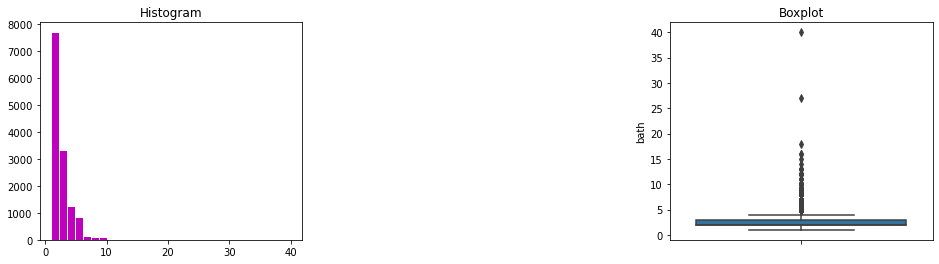

******* balcony *******


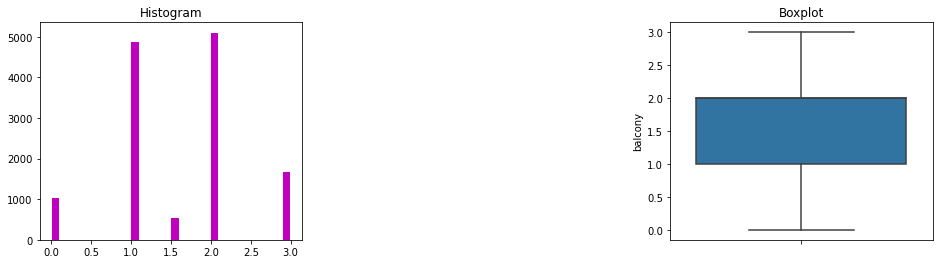

******* total_sqft_int *******


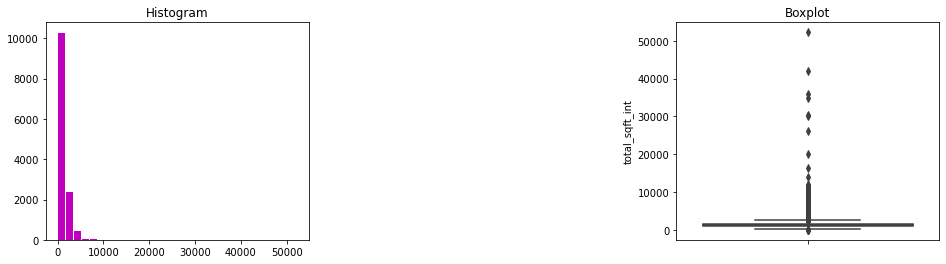

******* bhk *******


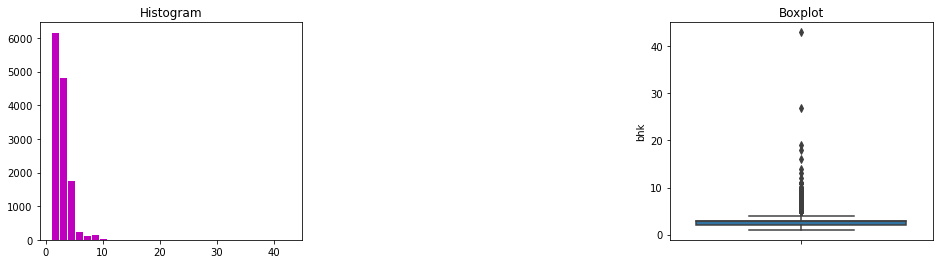

******* price *******


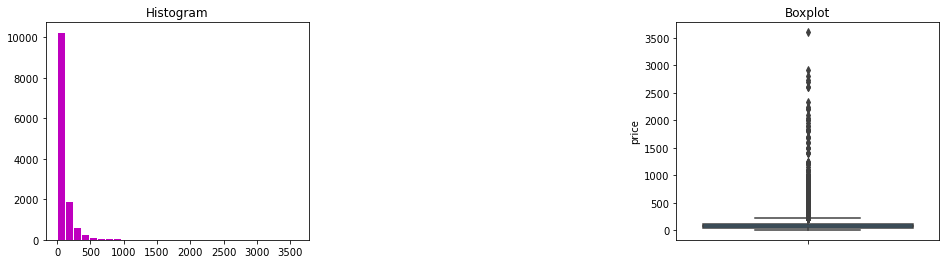

In [7]:
# function to create histogram,boxplotfor visulaising outliers
def outlier_plots(df, variable):
    
    plt.figure(figsize=(16, 4))
    # histogram
    plt.subplot(1, 3, 1)
    plt.hist(df[variable], bins=30,rwidth=0.9,color="m")
    plt.title('Histogram')
    # boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')
    plt.show()
 
num_var = ["bath","balcony","total_sqft_int","bhk","price"]
for var in num_var:
    print("******* {} *******".format(var))
    outlier_plots(df7, var)
 # here we observe outlier in bath,total_sqft_int,bhk,price features

In [8]:
#removing outliers in total_sqft_int
#consider minimum area of bhk=350 then remove rows < 350
df8 = df7[~(df7['total_sqft_int']/df7['bhk'] < 350)]
print("shape of df8:",df8.shape)

shape of df8: (12106, 10)


In [9]:
#removing outliers in price 
#create new feature that is price per squre foot 
df8['price_per_sqft'] = df8['price']*100000 / df8['total_sqft_int']  
df8.head()
print("price_per_sqft feature:","\n",df8.price_per_sqft.describe())
#here we can see huge difference between min and max of price_per_sqft min 267.847 max 176470.588235 
# Removing outliers using help of 'price per sqrt'  taking std and mean per location
def remove_pps_outliers(df):
  df_out = pd.DataFrame()
  for key, subdf in df.groupby('location'):
    m=np.mean(subdf.price_per_sqft)
    st=np.std(subdf.price_per_sqft)
    reduced_df = subdf[(subdf.price_per_sqft>(m-st))&(subdf.price_per_sqft<=(m+st))]
    df_out = pd.concat([df_out, reduced_df], ignore_index = True)
  return df_out
 
df9 = remove_pps_outliers(df8)
print("df9 shape:",df9.shape)

C:\Users\Bhargav\AppData\Local\Temp\ipykernel_18440\1594651795.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df8['price_per_sqft'] = df8['price']*100000 / df8['total_sqft_int']


price_per_sqft feature: 
 count     12106.000000
mean       6184.466889
std        4019.983503
min         267.829813
25%        4200.030048
50%        5261.108523
75%        6800.000000
max      176470.588235
Name: price_per_sqft, dtype: float64
df9 shape: (8888, 11)


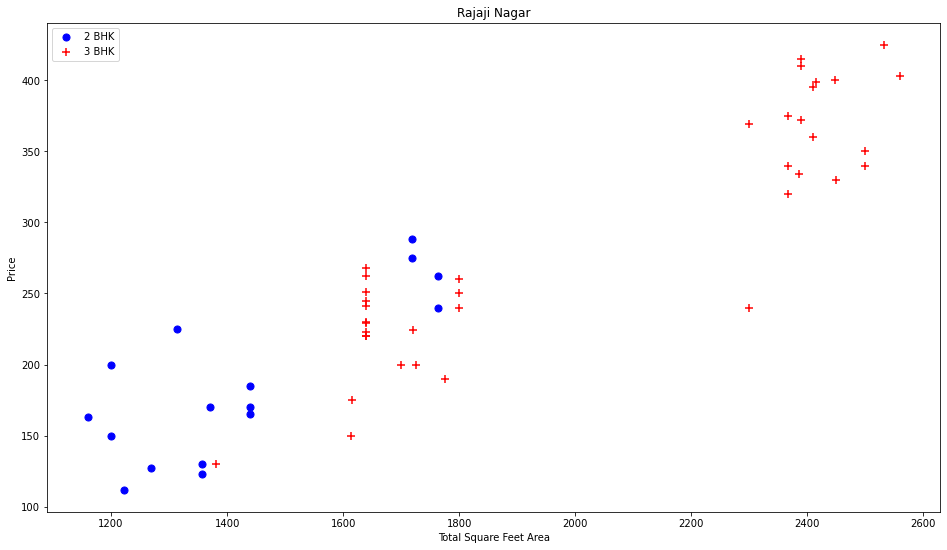

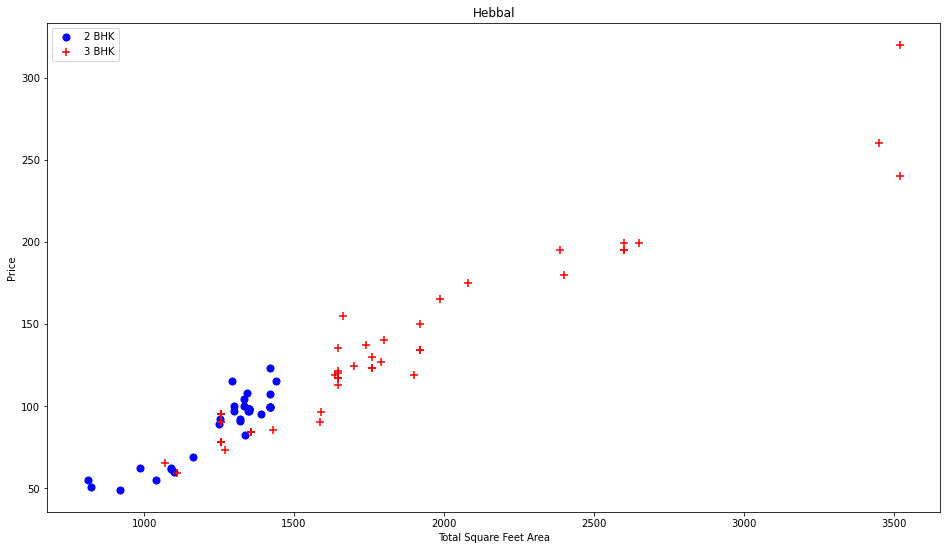

In [10]:
def plot_scatter_chart(df,location):
  bhk2 = df[(df.location==location) & (df.bhk==2)]
  bhk3 = df[(df.location==location) & (df.bhk==3)]
  plt.figure(figsize=(16,9))
  plt.scatter(bhk2.total_sqft_int, bhk2.price, color='Blue', label='2 BHK', s=50)
  plt.scatter(bhk3.total_sqft_int, bhk3.price, color='Red', label='3 BHK', s=50, marker="+")
  plt.xlabel("Total Square Feet Area")
  plt.ylabel("Price")
  plt.title(location)
  plt.legend()
 
plot_scatter_chart(df9, "Rajaji Nagar")
#below scatterplot we observe that at same location price of 2 bhk house is greater than 3 bhk so it is outlier
plot_scatter_chart(df9, "Hebbal")
#below scatterplot we observe that at same location price of 3 bhk house is less than 2 bhk so it is outlier

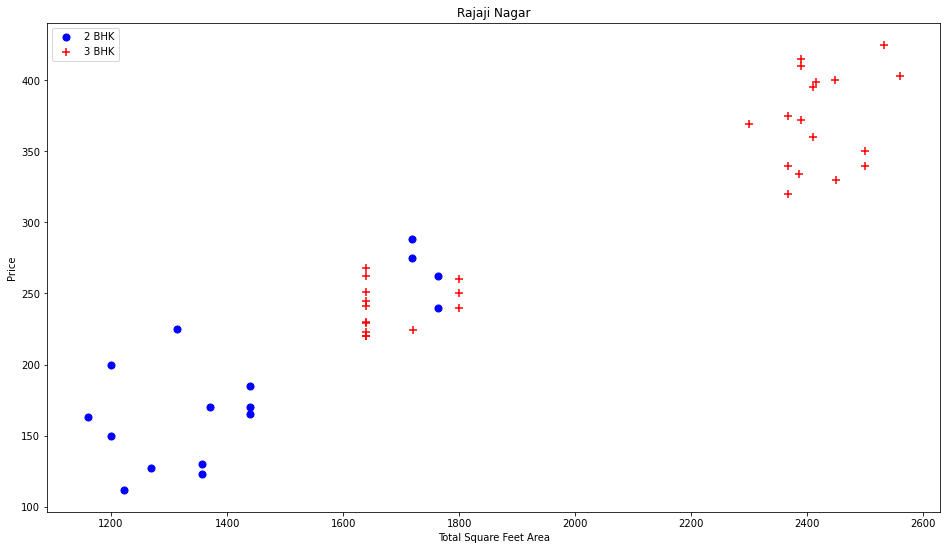

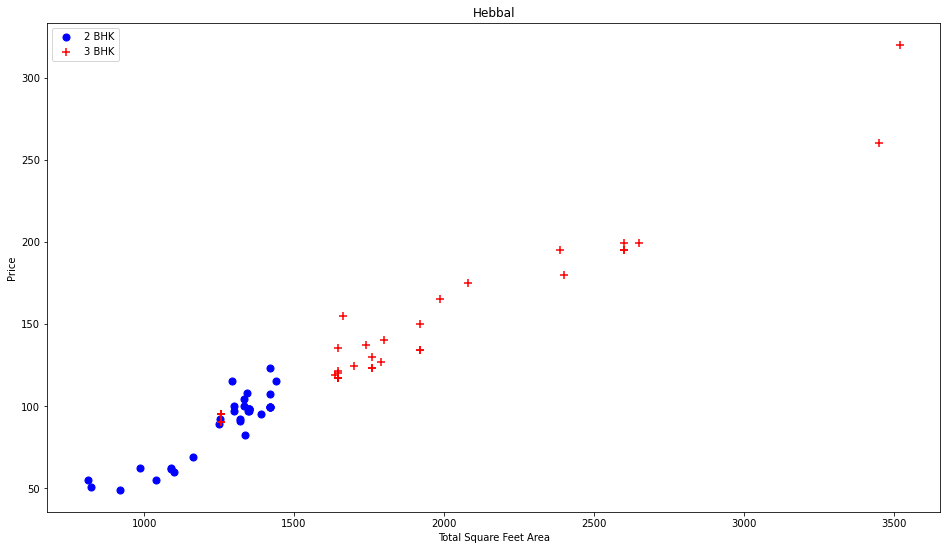

In [11]:
#removing outliers from bhk feature
def remove_bhk_outliers(df):
  exclude_indices = np.array([])
  for location, location_df in df.groupby('location'):
    bhk_stats = {}
    for bhk, bhk_df in location_df.groupby('bhk'):
      bhk_stats[bhk]={
          'mean':np.mean(bhk_df.price_per_sqft),
          'std':np.std(bhk_df.price_per_sqft),
          'count':bhk_df.shape[0]}
    for bhk, bhk_df in location_df.groupby('bhk'):
      stats=bhk_stats.get(bhk-1)
      if stats and stats['count']>5:
        exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
  return df.drop(exclude_indices, axis='index')
 
df10 = remove_bhk_outliers(df9)
df10.shape
 
plot_scatter_chart(df10, "Rajaji Nagar")

plot_scatter_chart(df10, "Hebbal")
# most ot the ouliers are removed from bhk coloum(compare both graps)

In [12]:
#removing outliers from bath feature
# here we are considering data only total no. bathroom =  bhk + 2
df11 = df10[df10.bath < df10.bhk+2]
print("df11 shape:",df11.shape)

df11 shape: (7120, 11)


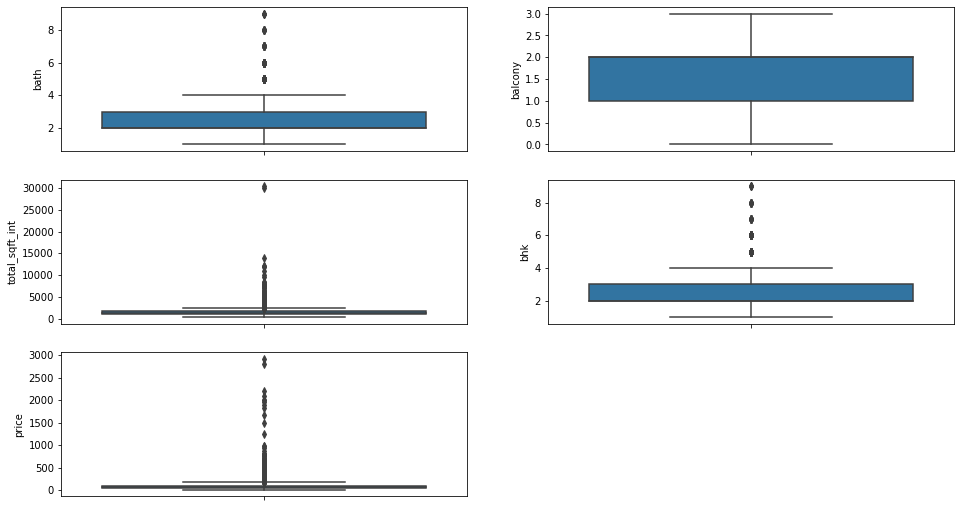

In [13]:
#after removing some of the outliers
plt.figure(figsize=(16,9))
for i,var in enumerate(num_var):
  plt.subplot(3,2,i+1)
  sns.boxplot(y=df11[var])

In [14]:
df12 = df11.drop(["size","total_sqft"], axis =1)
df12.head()

,area_type,availability,location,bath,balcony,price,total_sqft_int,bhk,price_per_sqft
0,Super built-up Area,Ready To Move,Devarabeesana Halli,3.0,2.0,150.0,1672.0,3,8971.291866
1,Built-up Area,Ready To Move,Devarabeesana Halli,3.0,3.0,149.0,1750.0,3,8514.285714
2,Super built-up Area,Ready To Move,Devarabeesana Halli,3.0,2.0,150.0,1750.0,3,8571.428571
4,Super built-up Area,Ready To Move,Devarachikkanahalli,2.0,2.0,40.0,1250.0,2,3200.000000
5,Plot Area,Ready To Move,Devarachikkanahalli,2.0,2.0,83.0,1200.0,2,6916.666667


## Encoding

In [15]:
#one hot encoding of area_type feature
df12['area_type'].value_counts()

Super built-up  Area    5345
Built-up  Area          1298
Plot  Area               441
Carpet  Area              36
Name: area_type, dtype: int64

In [16]:
df13 = df12.copy()
for cat_var in ["Super built-up  Area","Built-up  Area","Plot  Area"]:
  df13["area_type"+cat_var] = np.where(df13['area_type']==cat_var, 1,0)
df13.shape

(7120, 12)

In [17]:
# one hot encoding of "availability" feature
df13["availability"].value_counts()
# in availability feature, 10525 house 'Ready to Move" and remaining will be ready on perticuler date
#so we crate new feature ""availability_Ready To Move"" and add vale 1 if availability is Ready To Move else 0"

Ready To Move    5644
18-Dec            159
18-May            156
18-Apr            154
18-Aug            118
19-Dec            101
18-Jul             76
18-Mar             72
21-Dec             55
20-Dec             54
18-Jun             51
19-Mar             48
18-Feb             36
18-Nov             26
18-Oct             24
19-Jun             24
19-Jan             19
20-Jan             18
18-Sep             18
18-Jan             17
17-Dec             14
17-Oct             13
21-Mar             13
21-Jun             13
19-Sep             12
19-Aug             11
19-Jul             11
17-Jul             10
21-Jan             10
17-Jun              9
19-Apr              9
22-Dec              7
19-Oct              7
20-Jun              7
17-May              6
21-Jul              6
20-Aug              6
17-Sep              6
20-Oct              6
20-Sep              5
21-Feb              5
21-Oct              4
20-Nov              4
17-Nov              4
17-Apr              4
22-Jan    

In [18]:
df13["availability_Ready To Move"] = np.where(df13["availability"]=="Ready To Move",1,0)
df13.shape

(7120, 13)

In [19]:
# one hot encoding of "location_value_count" feature
location_value_count = df13['location'].value_counts()
location_value_count

Whitefield                             234
Sarjapur  Road                         183
Electronic City                        158
Marathahalli                           116
Raja Rajeshwari Nagar                  116
Haralur Road                           116
Hennur Road                            108
Bannerghatta Road                      108
Uttarahalli                            106
Thanisandra                            103
Electronic City Phase II                89
Hebbal                                  87
Yelahanka                               86
7th Phase JP Nagar                      86
Kanakpura Road                          85
KR Puram                                61
Sarjapur                                56
Rajaji Nagar                            55
Bellandur                               53
Kasavanhalli                            53
Begur Road                              51
Banashankari                            49
Kothanur                                49
Hormavu    

In [20]:
location_gert_20 = location_value_count[location_value_count>=20].index
location_gert_20

Index(['Whitefield', 'Sarjapur  Road', 'Electronic City', 'Marathahalli',
       'Raja Rajeshwari Nagar', 'Haralur Road', 'Hennur Road',
       'Bannerghatta Road', 'Uttarahalli', 'Thanisandra',
       'Electronic City Phase II', 'Hebbal', 'Yelahanka', '7th Phase JP Nagar',
       'Kanakpura Road', 'KR Puram', 'Sarjapur', 'Rajaji Nagar', 'Bellandur',
       'Kasavanhalli', 'Begur Road', 'Banashankari', 'Kothanur', 'Hormavu',
       'Harlur', 'Akshaya Nagar', 'Electronics City Phase 1', 'Jakkur',
       'Varthur', 'HSR Layout', 'Hennur', 'Ramamurthy Nagar', 'Chandapura',
       'Koramangala', 'Kaggadasapura', 'Kundalahalli', 'Ramagondanahalli',
       'Budigere', 'Hulimavu', 'Hoodi', 'Malleshwaram', 'Hegde Nagar',
       'Yeshwanthpur', 'Gottigere', '8th Phase JP Nagar', 'JP Nagar',
       'Channasandra', 'Bisuvanahalli', 'Vittasandra', 'Indira Nagar',
       'Old Airport Road', 'Sahakara Nagar', 'Brookefield', 'Kengeri',
       'Hosa Road', 'Vijayanagar', 'Balagere', 'Green Glen Layout

In [21]:
# location count is greter than 19 then we create column of that feature 
# then if this location present in location feature then set value 1 else 0 ( ohe hot encoding)
df14 = df13.copy()
for cat_var in location_gert_20:
  df14['location_'+cat_var]=np.where(df14['location']==cat_var, 1,0)
df14.shape

C:\Users\Bhargav\AppData\Local\Temp\ipykernel_18440\4288384140.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df14['location_'+cat_var]=np.where(df14['location']==cat_var, 1,0)
C:\Users\Bhargav\AppData\Local\Temp\ipykernel_18440\4288384140.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df14['location_'+cat_var]=np.where(df14['location']==cat_var, 1,0)


(7120, 111)

In [22]:
df15 = df14.drop(["area_type","availability",'location'], axis =1)
df15.to_csv('ohe_data_reduce_cat_class.csv', index=False)

In [23]:
## Split Dataset in train and test

from sklearn.model_selection import train_test_split
X = df15.drop("price", axis=1)
Y = df15['price']
print('Shape of X = ', X.shape)
print('Shape of Y = ', Y.shape)
X_train, x_test, Y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 51)
print('Shape of X_train = ', X_train.shape)
print('Shape of Y_train = ', Y_train.shape)
print('Shape of x_test = ', x_test.shape)
print('Shape of y_test = ', y_test.shape)

Shape of X =  (7120, 107)
Shape of Y =  (7120,)
Shape of X_train =  (5696, 107)
Shape of Y_train =  (5696,)
Shape of x_test =  (1424, 107)
Shape of y_test =  (1424,)


## Feature Scaling

In [24]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train= sc.transform(X_train)
x_test = sc.transform(x_test)

## Machine Learning Model

In [25]:
# Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
lr = LinearRegression()
lr_lasso = Lasso()
lr_ridge = Ridge()
  
lr.fit(X_train, Y_train)
lr_score = lr.score(x_test, y_test) 
lr_score

# Lasso 
lr_lasso.fit(X_train, Y_train)
lr_lasso_score=lr_lasso.score(x_test, y_test) 
lr_lasso_score

# Ridge
lr_ridge.fit(X_train, Y_train)
lr_ridge_score=lr_lasso.score(x_test, y_test) 
lr_ridge_score
 
# Support Vector Machine
 
from sklearn.svm import SVR
svr = SVR()
svr.fit(X_train,Y_train)
svr_score=svr.score(x_test,y_test)
svr_score
 
# Random Forest Regressor
 
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(X_train,Y_train)
rfr_score=rfr.score(x_test,y_test)
rfr_score

# KNN(k nearest neighbours)

from sklearn.neighbors import KNeighborsRegressor
KNN=KNeighborsRegressor(n_neighbors=7)
KNN.fit(X_train,Y_train)
KNN_score=KNN.score(x_test,y_test)
KNN_score

print(pd.DataFrame([{'Model': 'Linear Regression','Score':lr_score},
                    {'Model':'Ridge','Score':lr_ridge_score},
                    {'Model': 'Lasso','Score':lr_lasso_score},
                    {'Model': 'Support Vector Machine','Score':svr_score},
                    {'Model': 'Random Forest','Score':rfr_score},
                    {'Model':'KNN','Score':KNN_score}],
                    columns=['Model','Score']))

                    Model     Score
0       Linear Regression  0.790384
1                   Ridge  0.803637
2                   Lasso  0.803637
3  Support Vector Machine  0.206380
4           Random Forest  0.899153
5                     KNN  0.889960


In [26]:
# Model selection
#we select random forest(high score compared to others)
print(rfr.predict(x_test))
print(y_test,end=" ")

[ 80.1106   39.9271  119.97    ...  33.26645  63.4343  174.69   ]
2914      80.000
3698      40.000
477      120.000
1289      79.000
1336      45.000
2017      39.000
1271      53.000
4265      78.000
2324     101.000
5282      62.000
5521     105.000
4206     246.000
920      198.000
5404     233.000
6639     145.000
1479      48.000
2214      86.000
5980      94.000
5346     160.000
7981      54.000
1567      69.000
3332      48.000
3782      57.000
8749      75.000
6067     175.000
2736     400.000
8760      25.000
681       65.000
7401     153.000
7019     175.000
6387      56.000
944       51.980
1711      85.000
8701     260.000
4004     111.000
7752      47.000
3341      60.000
7586     103.000
8303      29.440
8030      86.000
6211      70.000
4263      45.000
233       80.000
1392      75.970
3651      75.000
3347      55.500
3827      82.000
1558      96.000
853       88.640
5919      48.000
3627      50.000
4923      30.000
2746      65.000
8790      75.000
3296     170.000

In [27]:
import pickle

In [28]:
pickle.dump(df,open('df.pkl','wb'))
pickle.dump(rfr,open('randomforest.pkl','wb'))